In [7]:
### load your data
import pandas as pd

df = pd.read_csv('./datasets/Air_Passengers.csv')
# df = pd.read_csv('./datasets/ETT/ETTh1.csv')
df.head()

,Date,#Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


In [22]:
### define target variables, covariates and timefeat
### there can be multiple target variables, covariates, but only one timefeat is allowed
### timefeat can also be empty, i.e., timefeat=''
targets = ['#Passengers']
covariates = []
timefeat = 'Date'

###define prediction length, i.e., number of forecast steps
pred_len = 48
###define prediction start step, it's N to last step in your data
pred_start = 12

###choose GTT model variant
modelchoice = 'small'
modelpath = f'./checkpoints/GTT-{modelchoice}'

###whether do 1st-order differencing before prediction, sometimes set autodiff=True will improve prediction accuracy
autodiff = False

ValueError: x and y must have same first dimension, but have shapes (62,) and (48,)

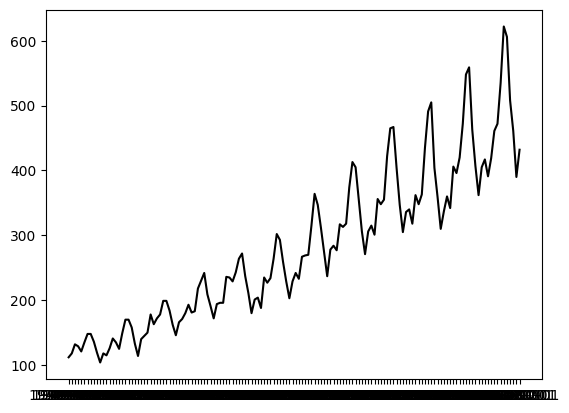

In [23]:
###use GTT model to conduct forecast, and plot results
from src.apis import zeroshot_api
res = zeroshot_api.forecast(df, targets, covariates, timefeat, pred_len, pred_start, modelpath, autodiff=autodiff)
if res['ret'] == 'success':
    zeroshot_api.plot_res(res)
else:
    print(res)